# Investigation into the magnitude of DCR effects

## Setup

Import libraries

In [28]:
from __future__ import print_function, division, absolute_import
%matplotlib inline
import calcRefractiveIndex
from calcRefractiveIndex import refraction as refraction
from calcRefractiveIndex import diff_refraction as diff
from calcRefractiveIndex import humidity_to_pressure as humidity_to_pressure
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab

In [4]:
reload(calcRefractiveIndex)

<module 'calcRefractiveIndex' from 'calcRefractiveIndex.py'>

Define a few helpful functions

In [2]:
def arcsec(var):
    return var * 3600.
def minmax(var):
    return [np.min(var),np.max(var)]

Test the calculation of refraction, and verify the correct spectral index is being used.
Should give:

n_delta = 27978.69

refraction = 20.990

In [6]:
print("n_delta = ",calcRefractiveIndex.n_delta(wavelength=3540., dry_pressure=1000, water_vapor_pressure=0, temperature=20.+273.15))
print("refraction = ",arcsec(refraction(wavelength=3540.,zenith_angle=20., atmospheric_pressure = 1.,
                        humidity=0, temperature = 20. , latitude = -30.244639, altitude = 2663.)))
#print(arcsec(diff(20.,wavelength=354.,bandwidth=66., atmospheric_pressure = 1., 
#                  water_vapor_pressure = 0.02, temperature = 20. , latitude = -30.244639, altitude = 2663.)))

n_delta =  27722.4459289
refraction =  21.0738594254


Define the temperature, pressure, and zenith angle ranges to use

In [7]:
base_temp = 10.
temps=np.array(range(100))/3.
temps = base_temp + temps - np.mean(temps)

base_pressure = 586.7 # mm Hg
base_pressure_atm=base_pressure / 760.

pressure_delta = 0.001
pressure_range = 0.1
pressures = ((np.array(range(1+int(2*pressure_range/pressure_delta)))* pressure_delta - pressure_range /2.) 
            * base_pressure_atm + base_pressure_atm)

angle_delta = 0.5
angle_max = 75.
zenith_angles = np.array(range(1+int(angle_max/angle_delta))) * angle_delta 

humidities = np.array(range(100))+1

# u band

## 1D plots

Plot the magnitude of DCR as a function of zenith angle, temperature, pressure individually

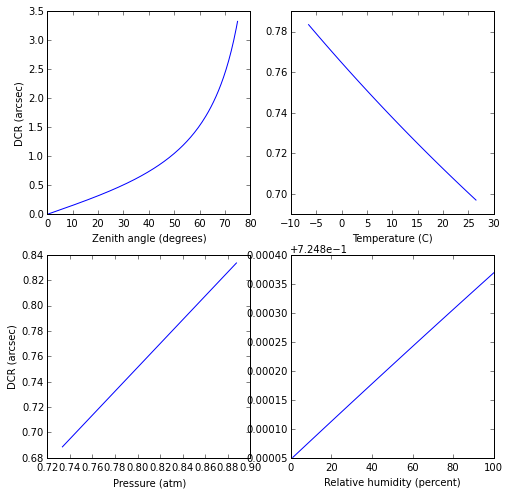

In [8]:
wavelength = 3540.
bandwidth = 660.

dcr_za = diff(wavelength,zenith_angles, bandwidth = bandwidth, temperature = base_temp, 
            atmospheric_pressure = base_pressure_atm)

dcr_temperature = diff(wavelength=wavelength, zenith_angle=40., bandwidth = bandwidth, temperature = temps, 
            atmospheric_pressure = base_pressure_atm)

dcr_pressure= diff(wavelength=wavelength, zenith_angle=40., bandwidth = bandwidth, temperature = 15., 
            atmospheric_pressure = pressures)

dcr_water= diff(wavelength=wavelength, zenith_angle=40., bandwidth = bandwidth, temperature = 15., 
            atmospheric_pressure = base_pressure_atm, humidity=humidities)

fig=plt.figure(figsize=(8,8))
plot_1 = fig.add_subplot(2,2,1)
plot_2 = fig.add_subplot(2,2,2)
plot_3 = fig.add_subplot(2,2,3)
plot_4 = fig.add_subplot(2,2,4)
za_plot=plot_1.plot(zenith_angles,arcsec(dcr_za))
lx = plot_1.set_xlabel('Zenith angle (degrees)')
ly = plot_1.set_ylabel('DCR (arcsec)')

temperature_plot = plot_2.plot(temps,arcsec(dcr_temperature))
lx = plot_2.set_xlabel('Temperature (C)')
#ly = plot_2.set_ylabel('DCR (arcsec)')

temperature_plot = plot_3.plot(pressures,arcsec(dcr_pressure))
lx = plot_3.set_xlabel('Pressure (atm)')
ly=plot_3.set_ylabel('DCR (arcsec)')

water_plot = plot_4.plot(humidities,arcsec(dcr_water))
lx = plot_4.set_xlabel('Relative humidity (percent)')
#ly = plot_4.set_ylabel('DCR (arcsec)')

## 2D plots

Now create a 3D array of differential refraction amplitudes as a function of zenith angle, temperature, and pressure

In [10]:
wavelength = 3540.
bandwidth = 660.
diff_refract_arr = np.zeros([temps.size, zenith_angles.size, pressures.size])
for p_i in range(pressures.size):
    for t_i in range(temps.size):
        diff_refract_arr[t_i, :, p_i] = diff(wavelength=wavelength, zenith_angle=zenith_angles, bandwidth = bandwidth, 
            temperature = temps[t_i], atmospheric_pressure = pressures[p_i])

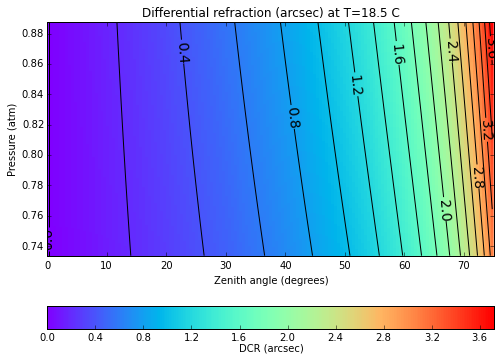

In [13]:
Y = pressures
X = zenith_angles
z_slice = 75
Z = arcsec(diff_refract_arr[z_slice, :, :]).T

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith angle (degrees)')
ax.set_ylabel('Pressure (atm)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at T=' + str(round(temps[z_slice]*100)/100) + ' C')


cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_ZA-Pressure.png',bbox_inches='tight')

plt.show()


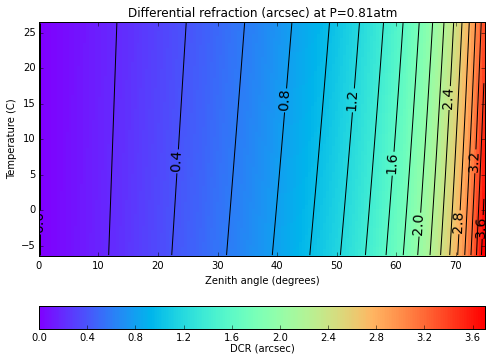

In [12]:
Y = temps
X = zenith_angles
z_slice=100
Z = arcsec(diff_refract_arr[:, :, z_slice])

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith angle (degrees)')
ax.set_ylabel('Temperature (C)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at P=' + str(round(pressures[z_slice]*100)/100) + 'atm')

cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_ZA-Temperature.png',bbox_inches='tight')
plt.show()

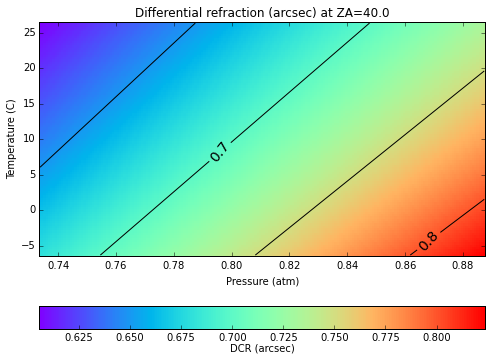

In [14]:
X = pressures
Y = temps
Z = arcsec(diff_refract_arr[:, z_slice, :])
z_slice=80

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.05)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Pressure (atm)')
ax.set_ylabel('Temperature (C)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at ZA=' + str(zenith_angles[z_slice]))

cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_Pressure-Temperature.png',bbox_inches='tight')
plt.show()

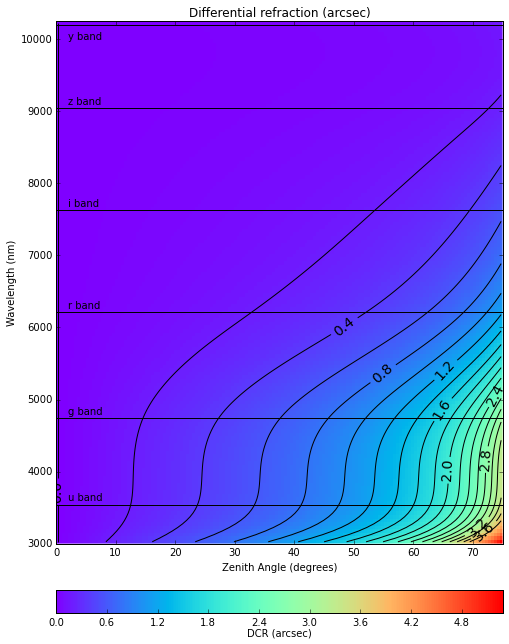

In [43]:
wavelength_delta = 50
wavelength_min = 3000.
wavelength_max = 10250.

wavelengths = (np.array(range(1+int((wavelength_max-wavelength_min)/wavelength_delta))) * wavelength_delta + 
    wavelength_min)

bandwidth_in = np.array([wavelength_min*(3950-3240)*2/(3950+3240), 3950-3240, 5520-4050, 6910-5520, 8180-6910, 9210-8180, 9970-9220, 1000])
wavelength_in = np.array([wavelength_min*2,3950+3240, 5520+4050, 6910+5520, 8180+6910, 9210+8180, 9970+9220,wavelength_max*2])/2.0
bandwidth_fn = interpolate.interp1d(wavelength_in, bandwidth_in, kind='cubic')
bandwidths = bandwidth_fn(wavelengths)

diff_refract_wavelengths = diff(wavelength=wavelengths, zenith_angle= zenith_angles, 
    bandwidth = bandwidths, temperature = base_temp, atmospheric_pressure = base_pressure_atm)

X = zenith_angles
Y = wavelengths
Z = arcsec(diff_refract_wavelengths)

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,12))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith Angle (degrees)')
ax.set_ylabel('Wavelength (nm)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 3540.0,color='k')
plt.text(2, 3600, 'u band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 4750.0,color='k')
plt.text(2, 4800, 'g band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 6220.0,color='k')
plt.text(2, 6270, 'r band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 7630.0,color='k')
plt.text(2, 7680, 'i band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 9050.0,color='k')
plt.text(2, 9100, 'z band')
ps = ax.plot(zenith_angles, np.zeros(zenith_angles.size) + 10200.0,color='k')
plt.text(2, 10000, 'y band')

ptitle=plt.title('Differential refraction (arcsec)')

#cbaxes = fig.add_axes([0.1, 0.9, 0.0, 0.1])
cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1, pad=0.07)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_ZA-wavelength.png',bbox_inches='tight')
plt.show()

In [90]:
k_B=1.38064852 * 10**-23
m=28.0*1.6749*10**-27
g=9.81
earth_R=6.371*10**6
print(k_B/(m*g*earth_R),0.001254/273.15)

4.71041970734e-06 4.5908841296e-06


In [40]:
bandwidths/wavelengths

array([ 0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19749652,  0.19749652,  0.19749652,  0.19749652,  0.19749652,
        0.19810924,  0.19932959,  0.2005432 ,  0.20175012,  0.20295041,
        0.20414412,  0.20533131,  0.20651203,  0.20768634,  0.20